# План:

* ## EDA

* ## Прогнозирование временных рядов

* ## Эластичность на примере

* ## План разработки приложения для ценообразования

# EDA

In [1]:
import pandas as pd
import numpy as np

In [3]:
!ls data/less4/lect/

1510001_agr.csv   1510003_agr.csv   conc_df.csv       sku_dict.csv
1510002_agr.csv   ZX10208_agr.csv   promo_1510002.csv


In [5]:
sku_dict = pd.read_csv('data/less4/lect/sku_dict.csv')
sku_dict.head()

,sku_id,fincode,ui1_code,ui2_code,ui3_code,vendor,brand_code,creation_date,expiration_date
0,43207,A1,A10,A1000,A1000001,A10001,A1000001,2018-01-01,2200-01-01 00:00:00
1,87209,UA,UA1,UA100,UA10000,BLW9FG,484JDFU5,2019-09-05,2200-01-01 00:00:00
2,33513,G9,G91,G9100,G910003,7I77VL,MMC2P4Y3,2018-07-21,2200-01-01 00:00:00
3,47505,AQ,AQ1,AQ100,AQ10000,4HJSP5,8FYENEWM,2018-03-26,2200-01-01 00:00:00
4,53350,6L,6L1,6L100,6L10005,JSOSD5,YTE7JS4H,2018-11-30,2200-01-01 00:00:00


In [6]:
sku_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sku_id           10000 non-null  int64 
 1   fincode          10000 non-null  object
 2   ui1_code         10000 non-null  object
 3   ui2_code         10000 non-null  object
 4   ui3_code         10000 non-null  object
 5   vendor           10000 non-null  object
 6   brand_code       10000 non-null  object
 7   creation_date    10000 non-null  object
 8   expiration_date  10000 non-null  object
dtypes: int64(1), object(8)
memory usage: 703.3+ KB


In [7]:
 for col in sku_dict.columns:
     print(col, sku_dict[f'{col}'].nunique())

sku_id 10000
fincode 31
ui1_code 46
ui2_code 109
ui3_code 804
vendor 25
brand_code 63
creation_date 669
expiration_date 582


In [8]:
sku_dict.fincode.unique()

array(['A1', 'UA', 'G9', 'AQ', '6L', '4W', 'ZR', '15', 'SI', 'BY', '70',
       'BJ', 'RI', 'MB', 'YT', 'K9', 'FE', 'Z8', 'GY', 'M2', 'XG', 'LT',
       'EH', 'ZX', 'H7', '8J', 'AG', 'B1', 'Q5', 'GV', 'B0'], dtype=object)

In [9]:
sku_dict.ui1_code.unique()

array(['A10', 'UA1', 'G91', 'AQ1', '6L1', '4W1', 'ZR1', '151', 'SI1',
       'BY1', '701', 'BJ1', 'RI1', 'MB1', 'YT1', 'K91', 'FE1', 'Z81',
       'GY1', 'M21', 'XG1', 'LT1', 'EH1', 'ZX1', 'H71', '8J1', 'AG1',
       'B11', 'Q51', 'GV1', 'B01', 'EH0', '700', 'M20', 'K90', 'GV0',
       'ZX0', 'B00', 'G90', 'SI0', 'BJ0', 'RI0', 'UA0', 'YT0', 'Z80',
       '4W0'], dtype=object)

In [10]:
sku_dict.ui2_code.unique()

array(['A1000', 'UA100', 'G9100', 'AQ100', '6L100', '4W100', 'ZR101',
       '15100', 'SI100', 'BY100', '70102', 'BJ100', 'G9101', 'RI100',
       'MB100', 'YT102', 'MB101', 'K9102', 'FE100', 'Z8100', 'GY100',
       'UA102', 'M2100', 'XG100', 'LT102', '70101', 'EH100', 'BY101',
       'LT100', 'ZX101', 'H7100', 'XG102', '4W102', 'ZR100', '8J100',
       'AG100', 'AG101', 'K9100', 'Z8101', 'MB102', 'B1100', '6L102',
       'Q5100', 'GV102', 'B0100', 'AQ101', 'GV100', '70100', 'ZR102',
       'UA101', 'GV101', 'M2102', 'LT101', 'GY101', 'YT100', 'AG102',
       'H7101', '6L101', 'SI101', 'B1102', '8J102', 'RI101', 'B1101',
       'BJ102', 'RI102', 'AQ102', 'GY102', 'EH102', 'Q5102', 'EH101',
       '4W101', 'BJ101', 'BY102', 'FE101', 'G9102', 'M2101', '15101',
       'B0102', 'XG101', 'ZX100', 'SI102', 'B0101', '15102', '8J101',
       'K9101', 'Q5101', 'EH000', 'YT101', 'H7102', 'ZX102', 'FE102',
       'Z8102', '70000', 'M2000', 'K9000', 'EH002', 'GV000', 'ZX001',
       'B0000', 'G90

In [11]:
sku_dict.ui3_code.unique()

array(['A1000001', 'UA10000', 'G910003', 'AQ10000', '6L10005', '4W10000',
       'ZR10100', 'AQ10008', '1510004', 'SI10006', 'AQ10005', 'BY10001',
       '7010200', 'AQ10001', 'BJ10001', 'G910100', 'RI10007', 'MB10006',
       'YT10204', 'MB10101', 'K910201', 'FE10002', 'Z810000', 'GY10000',
       'UA10200', 'M210008', 'UA10005', 'XG10002', 'LT10200', 'YT10200',
       '7010100', 'EH10000', 'BY10106', 'LT10007', 'ZX10102', 'H710000',
       'XG10207', 'XG10004', 'BY10000', '4W10207', 'ZR10000', '8J10004',
       'H710005', 'AG10002', 'Z810005', 'AG10100', 'K910005', 'UA10203',
       'EH10007', 'G910007', 'G910000', 'Z810100', '8J10003', 'ZR10005',
       'MB10201', 'LT10000', 'SI10005', 'B110000', '6L10207', 'BJ10000',
       'Q510000', 'GV10200', 'B010000', 'LT10207', 'AQ10105', 'EH10004',
       'M210000', 'GV10000', 'K910200', '7010000', 'ZR10208', 'UA10100',
       'ZX10104', 'GV10100', 'ZR10006', 'XG10000', '7010203', '1510007',
       'AG10000', '1510000', 'RI10000', 'LT10006',

In [14]:
sku_dict.brand_code.value_counts()

brand_code
4WL34OA2    459
8FYENEWM    439
THSTSG81    384
02Q78ADY    304
MMC2P4Y3    294
           ... 
SKXXW8V9     59
JK4UKBI2     52
74CKJ9XQ     51
H1BWFJRN     33
A1000001      1
Name: count, Length: 63, dtype: int64

In [15]:
sku_dict.vendor.value_counts()

vendor
UEYMBB    458
TJYT3A    447
71SM2O    445
7I77VL    440
LDLJFP    435
T9BUA7    434
2CI2A8    432
UH2WWF    430
SJP384    425
AWD3XQ    425
4HJSP5    419
BLW9FG    418
B4TA32    411
3GFIMK    411
SHL570    408
AO59EQ    403
VWHZMG    400
VZ44WY    399
H2OK0Z    399
FI3ASO    398
JSOSD5    398
GVL335    391
4O4WSH    390
CHQKSO    383
A10001      1
Name: count, dtype: int64

In [17]:
sku_dict.groupby(['fincode', 'ui1_code']).sku_id.agg('count').reset_index().sort_values('fincode')

,fincode,ui1_code,sku_id
0,15,151,326
1,4W,4W0,1
2,4W,4W1,345
3,6L,6L1,305
4,70,700,1
5,70,701,305
6,8J,8J1,322
7,A1,A10,1
8,AG,AG1,309
9,AQ,AQ1,347


In [18]:
sku_dict.groupby(['ui1_code', 'ui3_code']).sku_id.agg('count').reset_index().sort_values('ui1_code')

,ui1_code,ui3_code,sku_id
0,151,1510000,123
23,151,1510208,4
22,151,1510207,2
21,151,1510206,2
20,151,1510205,1
...,...,...,...
778,ZX1,ZX10001,11
777,ZX1,ZX10000,112
802,ZX1,ZX10207,1
789,ZX1,ZX10103,1


# ZX10208 Group

In [19]:
ZX10208_df = pd.read_csv('data/less4/lect/ZX10208_agr.csv')
ZX10208_df.head()

,dates,SKU,price_per_sku,num_purchases
0,2018-04-20,59567,169.19,3
1,2018-04-24,59567,171.71,3
2,2018-04-27,59567,174.04,3
3,2018-04-30,59567,NaN,1
4,2018-05-03,59567,176.38,2


In [20]:
ZX10208_df.SKU.unique()

array([59567, 82947])

In [21]:
sku_dict[sku_dict.sku_id.isin(ZX10208_df.SKU.unique())]

,sku_id,fincode,ui1_code,ui2_code,ui3_code,vendor,brand_code,creation_date,expiration_date
1484,59567,ZX,ZX1,ZX102,ZX10208,SJP384,3FAIRJ4W,2018-04-16,2019-04-21 00:00:00
4048,82947,ZX,ZX1,ZX102,ZX10208,TJYT3A,3FAIRJ4W,2018-09-26,2200-01-01 00:00:00


In [22]:
sku_dict.head()

,sku_id,fincode,ui1_code,ui2_code,ui3_code,vendor,brand_code,creation_date,expiration_date
0,43207,A1,A10,A1000,A1000001,A10001,A1000001,2018-01-01,2200-01-01 00:00:00
1,87209,UA,UA1,UA100,UA10000,BLW9FG,484JDFU5,2019-09-05,2200-01-01 00:00:00
2,33513,G9,G91,G9100,G910003,7I77VL,MMC2P4Y3,2018-07-21,2200-01-01 00:00:00
3,47505,AQ,AQ1,AQ100,AQ10000,4HJSP5,8FYENEWM,2018-03-26,2200-01-01 00:00:00
4,53350,6L,6L1,6L100,6L10005,JSOSD5,YTE7JS4H,2018-11-30,2200-01-01 00:00:00


In [23]:
sku_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sku_id           10000 non-null  int64 
 1   fincode          10000 non-null  object
 2   ui1_code         10000 non-null  object
 3   ui2_code         10000 non-null  object
 4   ui3_code         10000 non-null  object
 5   vendor           10000 non-null  object
 6   brand_code       10000 non-null  object
 7   creation_date    10000 non-null  object
 8   expiration_date  10000 non-null  object
dtypes: int64(1), object(8)
memory usage: 703.3+ KB


In [24]:
ZX10208_df.dates = pd.to_datetime(ZX10208_df.dates)

In [27]:
ZX10208_df[ZX10208_df.SKU == 82947].dates.describe()

count                              103
mean     2019-05-11 13:30:52.427184384
min                2018-09-28 00:00:00
25%                2019-01-17 00:00:00
50%                2019-04-30 00:00:00
75%                2019-09-21 12:00:00
max                2019-12-28 00:00:00
Name: dates, dtype: object

In [28]:
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

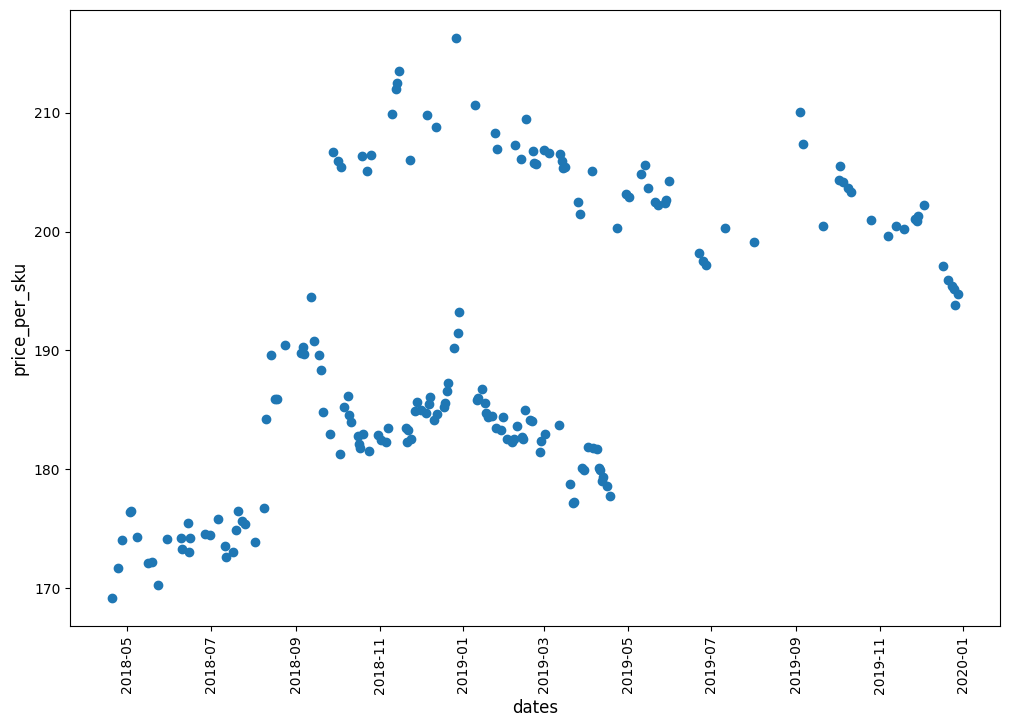

In [29]:
plt.figure(figsize=(12, 8))
plt.scatter(x='dates', y='price_per_sku', data=ZX10208_df)
plt.ylabel('price_per_sku', fontsize=12)
plt.xlabel('dates', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [33]:
# week nonth and year
ZX10208_df['week_num'] = ZX10208_df.dates.dt.isocalendar().week
ZX10208_df['year'] = ZX10208_df.dates.dt.year
ZX10208_df['months'] = ZX10208_df.dates.dt.month
ZX10208_df['year_week'] = ZX10208_df['year'].astype(str) + '_' + ZX10208_df['week_num'].astype(str)

In [34]:
ZX10208_df.head()

,dates,SKU,price_per_sku,num_purchases,week_num,year,months,year_week
0,2018-04-20,59567,169.19,3,16,2018,4,2018_16
1,2018-04-24,59567,171.71,3,17,2018,4,2018_17
2,2018-04-27,59567,174.04,3,17,2018,4,2018_17
3,2018-04-30,59567,NaN,1,18,2018,4,2018_18
4,2018-05-03,59567,176.38,2,18,2018,5,2018_18


In [35]:
ZX10208_gr = ZX10208_df.groupby(['year_week', 'SKU']).price_per_sku.mean().reset_index()

In [36]:
ZX10208_gr = ZX10208_df.rename(columns={'price_per_sku': 'mean_per_week'})

In [37]:
ZX10208_df = ZX10208_df.merge(ZX10208_gr, how='left', on=['year_week', 'SKU'])

In [38]:
ZX10208_df

,dates_x,SKU,price_per_sku,num_purchases_x,week_num_x,year_x,months_x,year_week,dates_y,mean_per_week,num_purchases_y,week_num_y,year_y,months_y
0,2018-04-20,59567,169.19,3,16,2018,4,2018_16,2018-04-20,169.19,3,16,2018,4
1,2018-04-24,59567,171.71,3,17,2018,4,2018_17,2018-04-24,171.71,3,17,2018,4
2,2018-04-24,59567,171.71,3,17,2018,4,2018_17,2018-04-27,174.04,3,17,2018,4
3,2018-04-27,59567,174.04,3,17,2018,4,2018_17,2018-04-24,171.71,3,17,2018,4
4,2018-04-27,59567,174.04,3,17,2018,4,2018_17,2018-04-27,174.04,3,17,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,2019-12-28,82947,194.78,1,52,2019,12,2019_52,2019-12-23,NaN,1,52,2019,12
803,2019-12-28,82947,194.78,1,52,2019,12,2019_52,2019-12-24,195.46,2,52,2019,12
804,2019-12-28,82947,194.78,1,52,2019,12,2019_52,2019-12-25,195.21,1,52,2019,12
805,2019-12-28,82947,194.78,1,52,2019,12,2019_52,2019-12-26,193.79,1,52,2019,12
